   # Phishing Website Detector #

# Importing essential libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import yellowbrick as yb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Reading

In [2]:
data=pd.read_csv("data/data.csv")
display(data)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


# Data description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


There are no object datatypes. Only numeric, either integer or floating point.    

In [4]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [5]:
from scipy.stats import kurtosis


for column in data.columns:
    column_kurtosis = kurtosis(data[column])
    if column_kurtosis==3:
        print(f"Kurtosis of column '{column}': {column_kurtosis}")
    else:
        continue

The spread of data for many columns is squeezed at 0, as seen from the values of 25th and 75th percentile as well as that of the middle 50%.
Though maximum value of almost all columns is non-zero. 

# Data Preprocessing

In [6]:
print("Column with constant values are:")
c=0
for column in data.columns:
            if data[column].unique().any()==True:
                
                continue
            else:
                print(column)
                c+=1
                data.drop(columns=column, inplace=True)
print(c)


Column with constant values are:
qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain
13


# Splitting Data
   
   To avoid overfitting, it's best to split data prior to performing EDA. 

In [7]:
x=data.drop("phishing",axis=1)
y=data["phishing"].copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
55124,2,0,0,0,0,0,0,0,0,0,...,611,1,4,5,43200,0,0,0,0,0
44575,3,0,0,0,0,0,0,0,0,0,...,2308,1,2,5,14399,1,1,0,0,0
87793,2,0,0,0,0,0,0,0,0,0,...,-1,1,4,0,292,1,0,0,0,0
5689,2,0,0,0,0,0,0,0,0,0,...,2400,1,3,1,3600,1,1,0,0,0
38932,2,0,0,0,0,0,0,0,0,0,...,104,1,2,1,21596,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,0,0,0,0,0,0,0,0,0,...,1025,1,2,5,300,1,0,0,0,0
54886,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,1,3592,0,2,0,0,0
76820,1,1,2,6,0,0,0,0,0,0,...,132,1,4,1,9221,0,0,0,0,0
860,2,0,0,0,0,0,0,0,0,0,...,716,1,3,4,14398,1,1,0,0,0


In [8]:
X_test

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
29026,4,0,0,0,0,0,0,0,0,0,...,-1,1,3,1,3598,0,-1,0,0,0
52848,2,0,0,0,0,0,0,0,0,0,...,256,1,2,1,3598,1,0,0,0,0
3821,2,0,0,0,0,0,0,0,0,0,...,165,2,2,0,299,1,0,0,0,0
74221,4,0,0,0,0,0,0,0,0,0,...,-1,1,3,3,3585,0,0,0,0,0
34258,2,0,0,0,0,0,0,0,0,0,...,-1,-1,8,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,1,0,0,3,0,0,0,0,0,0,...,2,1,2,2,596,0,1,0,0,0
42253,2,0,0,0,0,0,0,0,0,0,...,2896,1,2,1,3598,1,0,0,0,0
27839,1,5,0,2,0,0,0,0,0,0,...,1648,2,2,2,292,1,0,0,0,0
18370,2,0,0,0,0,0,0,0,0,0,...,1025,1,4,1,288,0,1,0,0,0


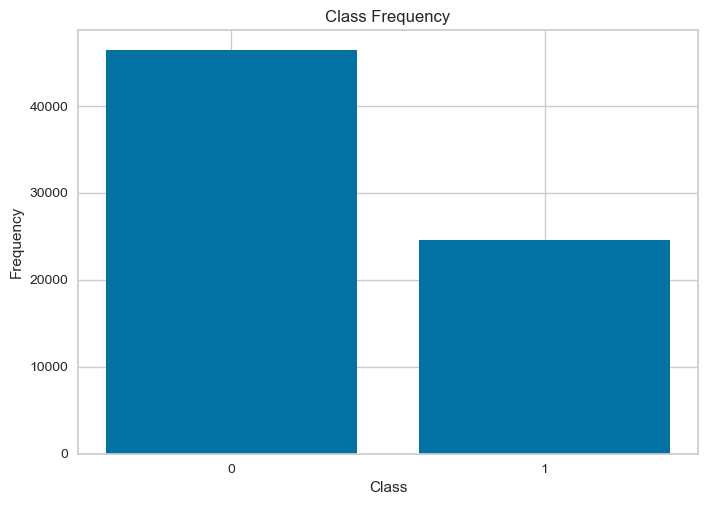

In [9]:
unique, counts = np.unique(y_train.astype(str), return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

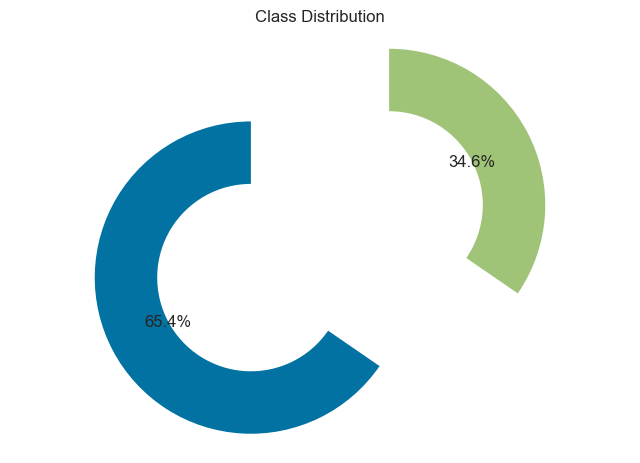

In [10]:
distribution=y_train.value_counts(normalize=True) * 100
plt.pie(distribution, distribution.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.gca().add_artist(plt.Circle((0,0),0.3,fc='white'))
plt.axis('equal')
plt.title('Class Distribution')
plt.show()



The data is mildly imbalanced. 

In [ ]:
y_train

# Feature Selection(Correlation)

In [10]:
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
result=correlation(X_train,0.7)
result2=correlation(X_test,0.7)
print("Number of hightly correlated features=", len(result), "\n")
print("Columns left= ", len(X_train.columns)-len(result), "\n")
X_train_features=X_train.drop(result,axis=1)
X_test_features=X_test.drop(result2,axis=1)
X_train_features

Number of hightly correlated features= 54 

Columns left=  44 



,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
55124,2,0,0,0,0,0,0,0,0,0,...,611,1,4,5,43200,0,0,0,0,0
44575,3,0,0,0,0,0,0,0,0,0,...,2308,1,2,5,14399,1,1,0,0,0
87793,2,0,0,0,0,0,0,0,0,0,...,-1,1,4,0,292,1,0,0,0,0
5689,2,0,0,0,0,0,0,0,0,0,...,2400,1,3,1,3600,1,1,0,0,0
38932,2,0,0,0,0,0,0,0,0,0,...,104,1,2,1,21596,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,0,0,0,0,0,0,0,0,0,...,1025,1,2,5,300,1,0,0,0,0
54886,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,1,3592,0,2,0,0,0
76820,1,1,2,6,0,0,0,0,0,0,...,132,1,4,1,9221,0,0,0,0,0
860,2,0,0,0,0,0,0,0,0,0,...,716,1,3,4,14398,1,1,0,0,0


#  Model Selection

In [11]:
rfc= RandomForestClassifier()
rfc.fit(X_train_features,y_train)
y_pred=rfc.predict(X_test_features)
print("Accuracy Score for Random Forest Classifier:",accuracy_score(y_test,y_pred))

Accuracy Score for Random Forest Classifier: 0.9697123519458545


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(100,110),      # Number of trees in the forest
    'max_depth': [None] + list(range(10, 100, 10)),  # Maximum depth of the trees
    'min_samples_split': randint(2, 20),      # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20)        # Minimum number of samples required to be at a leaf node
}

In [13]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_features, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021000061ED0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021073F98510>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021000028810>},
                   random_state=42, scoring='accuracy')

In [14]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 105}


In [15]:
best_model = random_search.best_estimator_

In [16]:
best_model

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=13,
                       n_estimators=105)

In [17]:


test_accuracy = best_model.score(X_test_features, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9652566271855612


# Feature Importance

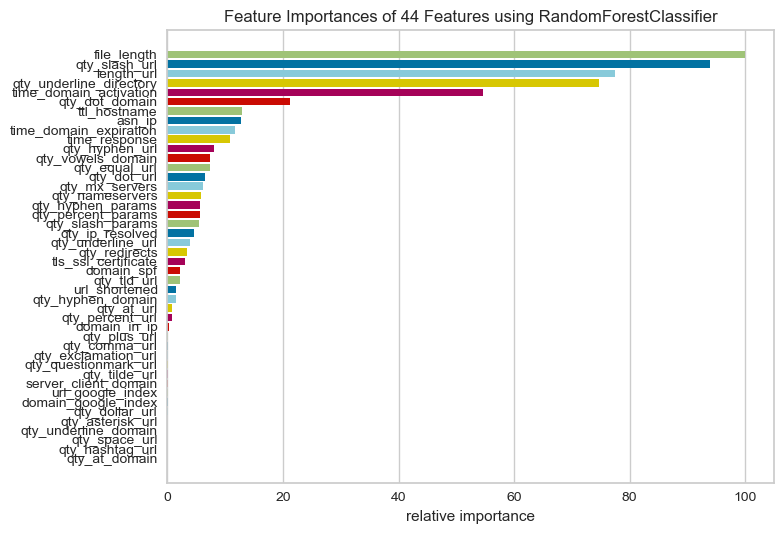

<Axes: title={'center': 'Feature Importances of 44 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [18]:
from yellowbrick.features import FeatureImportances
viz = FeatureImportances(best_model)
viz.fit(X_train_features, y_train)
viz.poof()

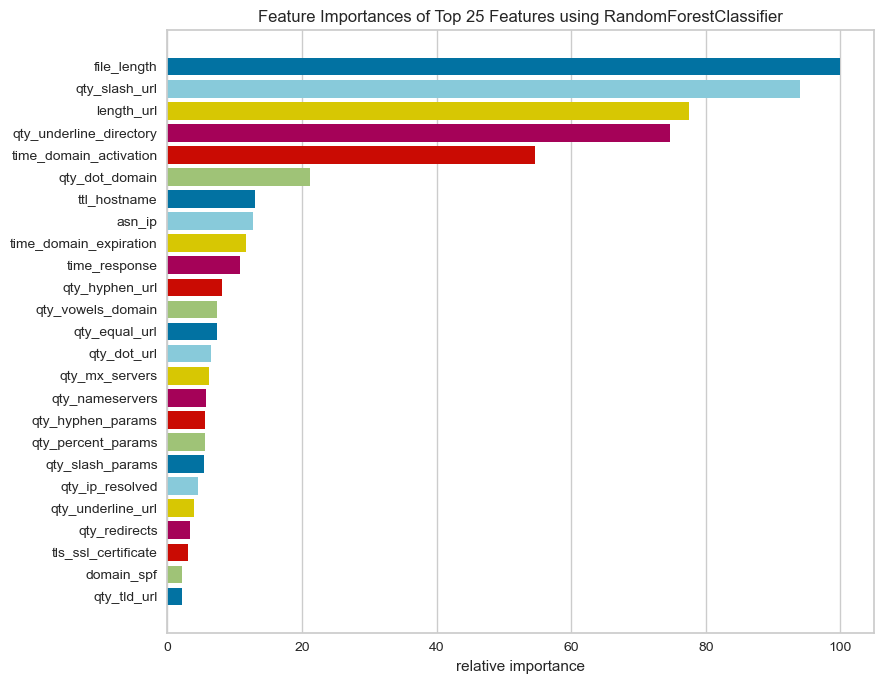

<Axes: title={'center': 'Feature Importances of Top 25 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [19]:
plt.figure(figsize=(9,7))
viz = FeatureImportances(best_model, topn=25)
viz.fit(X_train_features, y_train)
viz.show()

In [20]:
len(viz.features_)

25

In [21]:
X_train_features=X_train_features[viz.features_]

In [22]:
X_train_features

,qty_tld_url,domain_spf,tls_ssl_certificate,qty_redirects,qty_underline_url,qty_ip_resolved,qty_slash_params,qty_percent_params,qty_hyphen_params,qty_nameservers,...,time_response,time_domain_expiration,asn_ip,ttl_hostname,qty_dot_domain,time_domain_activation,qty_underline_directory,length_url,qty_slash_url,file_length
55124,1,0,0,0,0,1,-1,-1,-1,4,...,0.233623,611,15149,43200,2,6693,-1,21,0,-1
44575,1,0,1,1,0,1,-1,-1,-1,2,...,0.263120,2308,16509,14399,3,7188,-1,19,0,-1
87793,1,0,1,0,0,1,-1,-1,-1,4,...,0.378187,-1,15169,292,2,-1,-1,43,0,-1
5689,1,0,1,1,0,1,-1,-1,-1,3,...,1.726282,2400,46844,3600,2,8192,-1,17,0,-1
38932,1,1,1,2,0,1,-1,-1,-1,2,...,2.234205,104,198047,21596,2,3913,-1,23,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1,0,1,0,0,1,-1,-1,-1,2,...,0.987491,1025,13335,300,2,6279,-1,21,0,-1
54886,1,0,0,2,0,1,-1,-1,-1,2,...,0.131647,-1,44476,3592,2,-1,0,25,1,7
76820,1,-1,0,0,2,1,-1,-1,-1,4,...,0.547987,132,13576,9221,1,3519,2,59,6,0
860,1,0,1,1,0,1,-1,-1,-1,3,...,3.305917,716,26347,14398,2,3330,-1,14,0,-1


In [23]:
X_test_features=X_test_features[viz.features_]

In [24]:
X_test_features

,qty_tld_url,domain_spf,tls_ssl_certificate,qty_redirects,qty_underline_url,qty_ip_resolved,qty_slash_params,qty_percent_params,qty_hyphen_params,qty_nameservers,...,time_response,time_domain_expiration,asn_ip,ttl_hostname,qty_dot_domain,time_domain_activation,qty_underline_directory,length_url,qty_slash_url,file_length
29026,1,0,0,-1,0,1,-1,-1,-1,3,...,-1.000000,-1,28660,3598,4,8217,-1,26,0,-1
52848,1,0,1,0,0,1,-1,-1,-1,2,...,0.544093,256,29873,3598,2,5952,-1,20,0,-1
3821,1,0,1,0,0,2,-1,-1,-1,2,...,2.561885,165,13335,299,2,199,-1,16,0,-1
74221,1,1,0,0,0,1,-1,-1,-1,3,...,2.101813,-1,27715,3585,4,7883,-1,25,0,-1
34258,1,0,0,-1,0,-1,-1,-1,-1,8,...,-1.000000,-1,-1,-1,2,-1,-1,18,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,1,0,0,1,0,1,-1,-1,-1,2,...,0.813589,2,26496,596,1,5110,0,31,3,0
42253,1,0,1,0,0,1,-1,-1,-1,2,...,0.339202,2896,29873,3598,2,6599,-1,20,0,-1
27839,1,-1,1,0,0,2,-1,-1,-1,2,...,0.159472,1648,13335,292,1,5656,0,47,2,0
18370,1,-1,0,1,0,1,-1,-1,-1,4,...,1.168004,1025,17054,288,2,7374,-1,18,0,-1


# Model Training

In [25]:
best_model.fit(X_train_features,y_train)
y_pred=best_model.predict(X_test_features)
print("Accuracy Score for Random Forest Classifier:",accuracy_score(y_test,y_pred))

Accuracy Score for Random Forest Classifier: 0.9666666666666667


In [26]:
y_train_pred=best_model.predict(X_train_features)
y_pred=best_model.predict(X_test_features)

model_train_accuracy=accuracy_score(y_train,y_train_pred)
model_train_f1=f1_score(y_train,y_train_pred)
model_train_precision=precision_score(y_train,y_train_pred)
model_train_recall=recall_score(y_train,y_train_pred)
model_train_rocauc=roc_auc_score(y_train,y_train_pred)
            
model_test_accuracy=accuracy_score(y_test,y_pred)
model_test_f1=f1_score(y_test,y_pred)
model_test_precision=precision_score(y_test,y_pred)
model_test_recall=recall_score(y_test,y_pred)
model_test_rocauc=roc_auc_score(y_test,y_pred)
            
print("Model Performance Training")
print("Accuracy: {:.4f}".format(model_train_accuracy))
print("F1 Score:{:.4f}".format(model_train_f1))
print("Precision: {:.4f}".format(model_train_precision))
print("Recall: {:.4f}".format(model_train_recall))
print("ROC: {:.4f}".format(model_train_rocauc))
print("\n")
print("Model Performance Testing")
print("Accuracy: {:.4f}".format(model_test_accuracy))
print("F1 Score:{:.4f}".format(model_test_f1))
print("Precision: {:.4f}".format(model_test_precision))
print("Recall: {:.4f}".format(model_test_recall))
print("ROC: {:.4f}".format(model_test_rocauc))

Model Performance Training
Accuracy: 0.9825
F1 Score:0.9747
Precision: 0.9728
Recall: 0.9766
ROC: 0.9811


Model Performance Testing
Accuracy: 0.9667
F1 Score:0.9521
Precision: 0.9448
Recall: 0.9595
ROC: 0.9650


In [27]:
np.mean(cross_val_score(best_model,X_train_features,y_train,cv=10,scoring='accuracy'))

0.9666936007870609

# Prediction Error

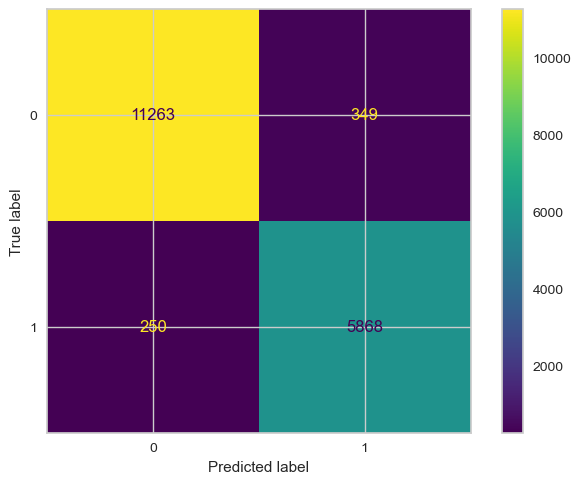

In [39]:

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_model.classes_)
disp.plot()

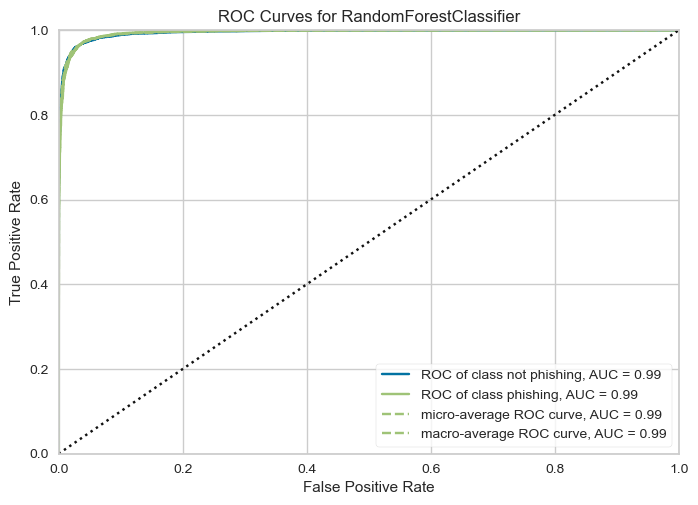

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(best_model, classes=["not phishing", "phishing"])

visualizer.fit(X_train_features, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_features, y_test)        # Evaluate the model on the test data
visualizer.show()       

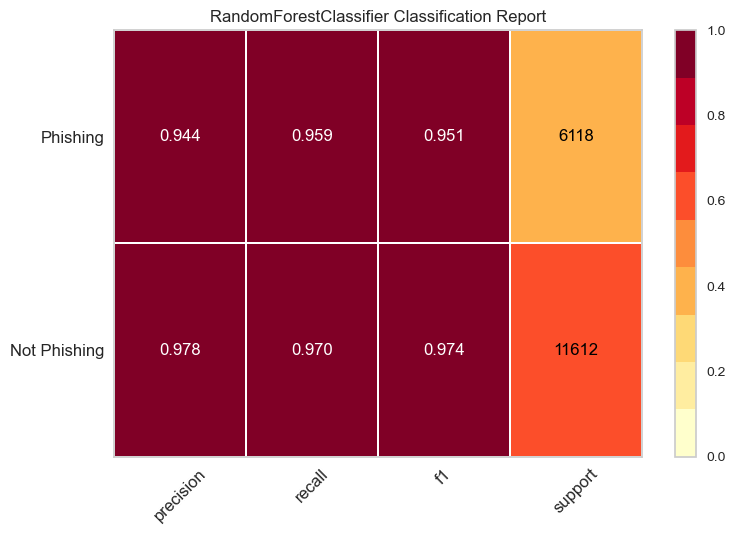

In [41]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(best_model, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'}, support=True)
visualizer.fit(X_train_features, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_features, y_test)   
visualizer.show()
plt.show()

In [29]:
ls

 Volume in drive C is OS
 Volume Serial Number is FAA3-A154

 Directory of C:\Users\Dell\New folder (2)\notebook

29-03-2024  12:15    <DIR>          .
29-03-2024  00:50    <DIR>          ..
02-03-2024  22:37    <DIR>          .ipynb_checkpoints
26-01-2024  18:44    <DIR>          data
26-01-2024  18:02                 0 datamain.py
29-03-2024  12:15           488,277 Phishing-Domain-Detector.ipynb
               2 File(s)        488,277 bytes
               4 Dir(s)  15,866,351,616 bytes free
